# <center>Bank Churn Model</center>

### Sources and credits for this project

- https://www.kaggle.com/shrutimechlearn/churn-modelling
- Big thanks to https://www.superdatascience.com/pages/deep-learning
- author: Shruti_Iyyer https://www.kaggle.com/shrutimechlearn
- Book: Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.
- K-Neighbors Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- K-nearest neighbors algorithm: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
- Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Random decision forests: https://en.wikipedia.org/wiki/Random_forest
- Optimizing parameters: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
- Confusion matrix: https://en.wikipedia.org/wiki/Confusion_matrix

## Introduction and Goal definition

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. The column representing it is 'Exited', with 1 for a customer that did exited, and 0 for a customer who stayed.

So to answear the question of if a customer left the bank or no' we are going to build two classification models using some known classification algorithms: KNN and Random-Forest.

### Workflow stages

1. Prepare and clean the data for work. 
2. Analyze, identify patterns, and explore the data.
3. Division of the records into a training group and a test group.
4. Models training and evaluation.

## 1) Prepare and clean the data for work

In [63]:
# some basic imports that will surely be useful
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
)
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [4]:
data.groupby(['Geography']).mean()

RowNumber    CustomerId  CreditScore        Age    Tenure  \
Geography                                                                
France     5025.228560  1.569065e+07   649.668329  38.511767  5.004587   
Germany    5000.278996  1.569056e+07   651.453567  39.771622  5.009964   
Spain      4950.667743  1.569192e+07   651.333872  38.890997  5.032297   

                 Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Geography                                                            
France      62092.636516       1.530913   0.706621        0.516753   
Germany    119730.116134       1.519729   0.713830        0.497409   
Spain       61818.147763       1.539362   0.694792        0.529673   

           EstimatedSalary    Exited  
Geography                             
France        99899.180814  0.161548  
Germany      101113.435102  0.324432  
Spain         99440.572281  0.166734

### Attributes explanation:

- RowNumber: Row Numbers from 1 to 10000.
- CustomerId: Unique Ids for bank customer identification.
- Surname: Customer's last name.
- CreditScore: Credit score of the customer.
- Geography: The country from which the customer belongs.
- Gender: Male or Female.
- Age: Age of the customer. 
- Tenure: Number of years for which the customer has been with the bank.
- Balance: Bank balance of the customer.
- NumOfProducts: Number of bank products the customer is utilising.
- HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not.
- IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not.
- EstimatedSalary: Estimated salary of the customer in Dollars.
- Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

### Basic Exploratory Of The Data - Quick Look at the Data Structure

We want to check for unneccecery and problamatic columns that might need removal or normalization.

Let's take a basic look about the columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The data is clean from null values, and is mostly conducted from numerical values.
The columns that are conducted from Object values are:

- Surname: Non-categorial so with no benefit for our reasearch.
- Geography: Categorial, we will look further to see which ones.
- Gender: Categorial, Males and Females.

In [6]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

We can see that our bank serves only three countries: mainly France, but also Germany and Spain. Also we can see most of it's customers are male.

In [8]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

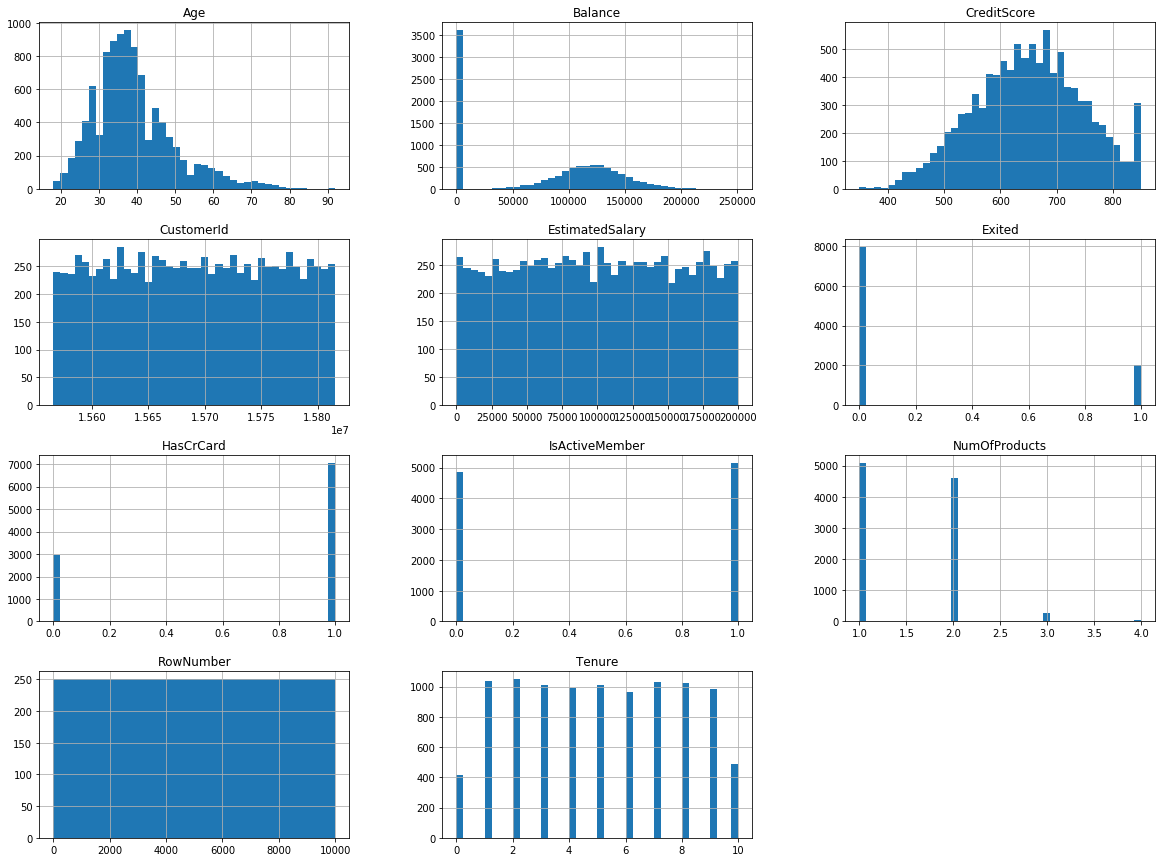

In [9]:
data.hist(bins=40, figsize=(20,15))
plt.show()

Describing the data starts reavilling more intresting insights about the numerical features but we will go deeper on that later.

For now, we can notice:

- Age, is a bit long-tail.
- Balance might have an outlier.
- Estimated Salary, IsActiveMember and Tenure are spread pretty even.
- Most customers did not exit.
- Most customers has a credit card.
- Almost all customers are using 1-2 products.

### Cleaning The Data

I will drop completely useless columns.

In [10]:
# 'og_data' => original data. keeping a copy of the original data.
og_data = data
data.drop(['CustomerId','RowNumber','Surname'], axis=1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Converting Object Columns to Numerical

In [12]:
gender_dummies = pd.get_dummies(data['Gender'])
geo_dummies = pd.get_dummies(data['Geography'], prefix = "Geo_dummy")
data = pd.concat([data, geo_dummies, gender_dummies], axis = 1)
data.drop(['Geography', 'Gender', 'Female'],axis = 1, inplace=True)
data.rename(columns={'Male': 'Gender'}, inplace=True)
data

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geo_dummy_France  \
0                  1        101348.88       1                 1   
1                  1        112542.58       0                 0   
2                  0        113931.57       1                 1   
3                  0         93826.63       0                 1   
4                  1         79084.10       0                 0   
...              ...              ...     ...               ...   
9995               0         96270.64       0                 1   
9996               1        101699.77       0                 1   
9997               1         42085.58       1                 1   
9998               0         92888.52       1                 0   
9999               0         38190.78       0                 1   

      Geo_dummy_Germany  Geo_dummy_Spain  Gender  
0                     0                0       0  
1                     0                1       0  
2                     0                0       0  
3                     0                0       0  
4                     0                1       0  
...                 ...              ...     ...  
9995                  0                0       1  
9996                  0                0       1  
9997                  0                0       0  
9998                  1                0       1  
9999                  0                0       0  

[10000 rows x 13 columns]

Rearange for the columns order:

In [13]:
list(data.columns.values)

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Geo_dummy_France',
 'Geo_dummy_Germany',
 'Geo_dummy_Spain',
 'Gender']

In [14]:
data = data[[
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geo_dummy_France',
 'Geo_dummy_Germany',
 'Geo_dummy_Spain',
 'Exited'
]]
data

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geo_dummy_France  Geo_dummy_Germany  \
0                  1        101348.88                 1                  0   
1                  1        112542.58                 0                  0   
2                  0        113931.57                 1                  0   
3                  0         93826.63                 1                  0   
4                  1         79084.10                 0                  0   
...              ...              ...               ...                ...   
9995               0         96270.64                 1                  0   
9996               1        101699.77                 1                  0   
9997               1         42085.58                 1                  0   
9998               0         92888.52                 0                  1   
9999               0         38190.78                 1                  0   

      Geo_dummy_Spain  Exited  
0                   0       1  
1                   1       0  
2                   0       1  
3                   0       0  
4                   1       0  
...               ...     ...  
9995                0       0  
9996                0       0  
9997                0       1  
9998                0       1  
9999                0       0  

[10000 rows x 13 columns]

## 2) Analyze, identify patterns, and explore the data

Now that we have our data basicly ready to work with, we can examn it more closly to have deeper understanding of the data, analyzing, looking for patterns, corralations and finaly deciding which features are relavent to us and which models to develop.

### Looking for outliers

We can use boxplot to detect pretty easily if there is any outliers in any of our attributes.

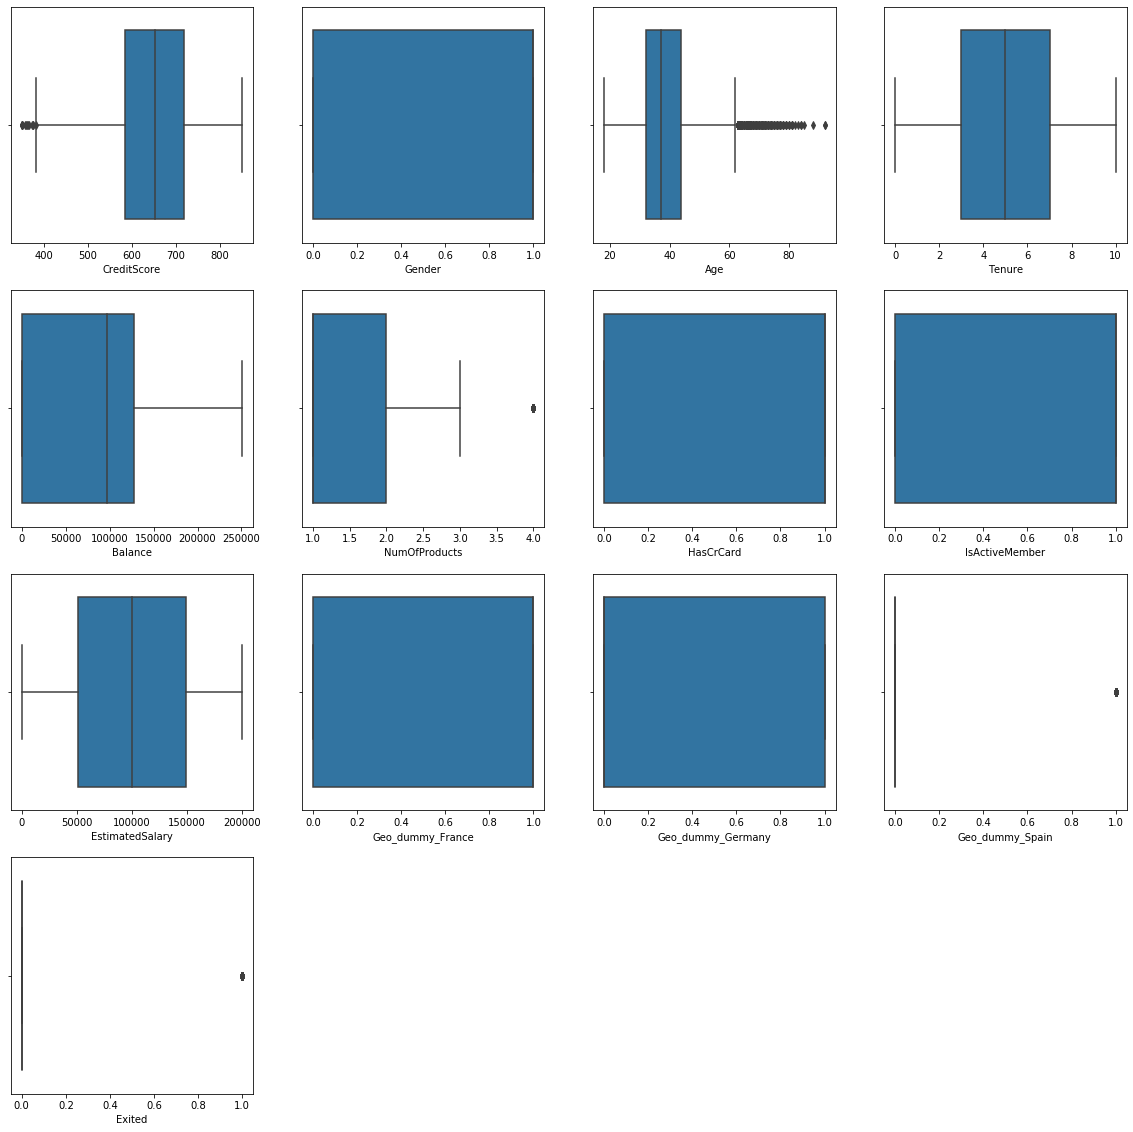

In [15]:
cols = list(data.columns)

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for i in cols:
    plt.subplot(a, b, c)
    sns.boxplot(x=data[i])
    c += 1

plt.show()

Even we might see tiny exceptions in some attributes, they are not real outliers. When we look closer in each of them and considering the scale of each of them, then we see the "exceptions" are not far enough, so there are no real outliers for us to remove.

### Features Correlation Matrix

I want to start with a simple correlation matrix to look for noticeable correlation between features, and in particular, between features to the 'Exited' value.

In [16]:
corr = data.corr()
corr.style\
    .background_gradient(cmap='viridis', axis=None)\
    .set_precision(2)\
    .set_caption('Features Correlation Matrix')\

To be more specific, we can see the correlation of each attribute to 'Extied', where numbers closer to the edges are what we are looking for. A value close to 1 indicates strong positive correlation, and a value close to -1 indicates strong negative correlation.

In [17]:
corr['Exited'].sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geo_dummy_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geo_dummy_Spain     -0.052667
Geo_dummy_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

Our top candidates (an absolute score of at least 0.1) are:

Positive correlation:

- Age
- Geo_dummy_Germany
- Balance

Positive correlation:

 - IsActiveMember
 - Gender
 - Geo_dummy_France

### Balance to NumOfProducts

Text(0, 0.5, 'Balance')

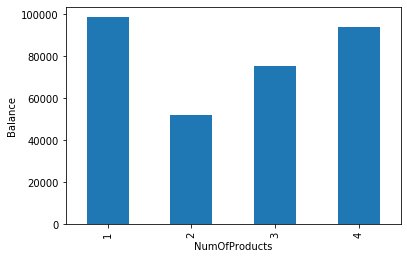

In [18]:
BalanceNumOfProducts = data.groupby('NumOfProducts')['Balance'].mean()
BalanceNumOfProducts = BalanceNumOfProducts.plot.bar()
BalanceNumOfProducts.set_ylabel("Balance")

### NumOfProducts to Exited

Text(0, 0.5, 'Exited')

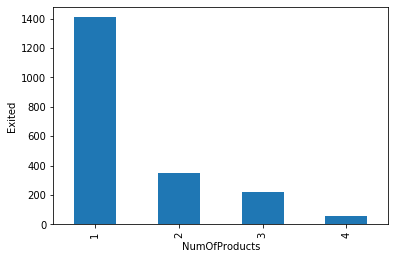

In [19]:
NumOfProductsExited = data.groupby('NumOfProducts')['Exited'].sum()
NumOfProductsExited = NumOfProductsExited.plot.bar()
NumOfProductsExited.set_ylabel("Exited")

### Age to Exited

Text(0, 0.5, 'Exited')

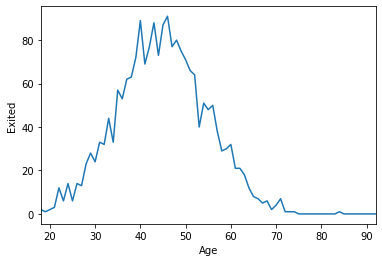

In [22]:
AgeExited = data.groupby('Age')['Exited'].sum()
AgeExited = AgeExited.plot.line()
AgeExited.set_ylabel("Exited")

### Country to Balance

Text(0, 0.5, 'Exited')

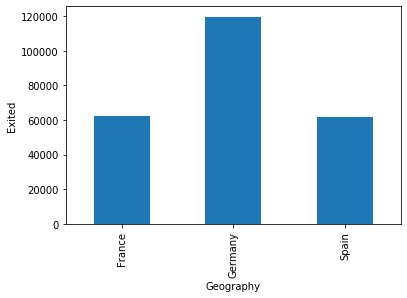

In [23]:
ogdata = pd.read_csv('Churn_Modelling.csv')
countryBalance = ogdata.groupby('Geography')['Balance'].mean()
countryBalance = countryBalance.plot.bar()
countryBalance.set_ylabel("Exited")

### Country to Exited

Text(0, 0.5, 'Exited')

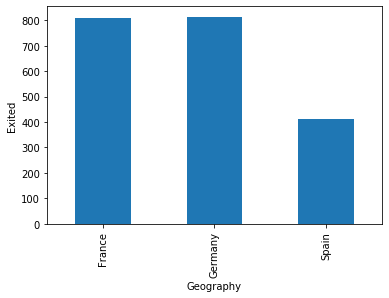

In [24]:
countryExited = ogdata.groupby('Geography')['Exited'].sum()
countryExited = countryExited.plot.bar()
countryExited.set_ylabel("Exited")

## 3) Division of the records into a training group and a test group

In [25]:
X = data.drop(['Exited'], axis=1)
y = data["Exited"]

### Normalizing the Data

To get better results from our model we can normalize the data.
A good scaler for that would be MinMaxScaler which is known to be sensetive to outliers but because we made sure we do not have outliers we can confidently use it.

In [26]:
from sklearn.preprocessing import MinMaxScaler

X_cols = X.columns
scaler = MinMaxScaler()
norm_X = scaler.fit_transform(X)
norm_X = pd.DataFrame(norm_X, columns=X_cols)
norm_X

CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
0           0.538     0.0  0.324324     0.2  0.000000       0.000000   
1           0.516     0.0  0.310811     0.1  0.334031       0.000000   
2           0.304     0.0  0.324324     0.8  0.636357       0.666667   
3           0.698     0.0  0.283784     0.1  0.000000       0.333333   
4           1.000     0.0  0.337838     0.2  0.500246       0.000000   
...           ...     ...       ...     ...       ...            ...   
9995        0.842     1.0  0.283784     0.5  0.000000       0.333333   
9996        0.332     1.0  0.229730     1.0  0.228657       0.000000   
9997        0.718     0.0  0.243243     0.7  0.000000       0.000000   
9998        0.844     1.0  0.324324     0.3  0.299226       0.333333   
9999        0.884     0.0  0.135135     0.4  0.518708       0.000000   

      HasCrCard  IsActiveMember  EstimatedSalary  Geo_dummy_France  \
0           1.0             1.0         0.506735               1.0   
1           0.0             1.0         0.562709               0.0   
2           1.0             0.0         0.569654               1.0   
3           0.0             0.0         0.469120               1.0   
4           1.0             1.0         0.395400               0.0   
...         ...             ...              ...               ...   
9995        1.0             0.0         0.481341               1.0   
9996        1.0             1.0         0.508490               1.0   
9997        0.0             1.0         0.210390               1.0   
9998        1.0             0.0         0.464429               0.0   
9999        1.0             0.0         0.190914               1.0   

      Geo_dummy_Germany  Geo_dummy_Spain  
0                   0.0              0.0  
1                   0.0              1.0  
2                   0.0              0.0  
3                   0.0              0.0  
4                   0.0              1.0  
...                 ...              ...  
9995                0.0              0.0  
9996                0.0              0.0  
9997                0.0              0.0  
9998                1.0              0.0  
9999                0.0              0.0  

[10000 rows x 12 columns]

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.20, random_state=0)

print('X_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (8000, 12)
y_train shape:  (8000,)
X_test shape:  (2000, 12)
y_test shape:  (2000,)


## 4) Models training and evaluation.

After exploring the data and getting interesting conclusions we want to let the computer find us the deep connections between the different attributes to the result of a customer leaving the bank.
For that mission we will use two very popular classification algorithms:

KNN (k-nearest neighbors algorithm):
- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

Random decision forests:
- Random decision forests operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

We will also use a confusion matrix, also known as an error matrix, it is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa)

In [28]:
from IPython import display 
display.Image("images/conf_mat.png")

FileNotFoundError: No such file or directory: 'images/conf_mat.png'

FileNotFoundError: No such file or directory: 'images/conf_mat.png'

<IPython.core.display.Image object>

In [29]:
# importing classification algorithms and evaluation tools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### KNN Model

In [30]:
# Defining the model with an arrbitery k number of 8 neighbors as a starting point:
knn = KNeighborsClassifier(n_neighbors=8)

# Training the model:
knn.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred1 = knn.predict(x_test)

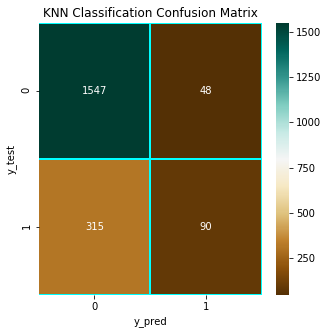

In [31]:
# Creating the confusion matrix:
knn_cm = confusion_matrix(y_test, y_pred1)

# Visualization:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [32]:
knn_score = knn.score(x_test, y_test)
print(knn_score)

0.8185


Our score is about 81.85% and that is a nice score but we want to get a more acuurate score using different splits of the data.

In [33]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8)
#train model with cv of 5 
knn_cv_scores = cross_val_score(knn_cv, norm_X, y, cv=5)
#print each cv score (accuracy) and average them
print(knn_cv_scores)
print(f'cv_scoremean:{np.mean(knn_cv_scores)}')

[0.8095 0.825  0.8145 0.8175 0.8205]
cv_scoremean:0.8173999999999999


Using cross-validation, our mean score is about 81.74%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the K-Fold method.

Our initial k-NN model parameter ‘n_neighbors’ was set to 8 just as an arrbitary starting point.
To find the optimal parameters for our model and to improve accuracy, we will use GridSearchCV to find the optimal value for ‘n_neighbors’.
GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.
For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model.

In [34]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn_grid = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(estimator=knn_grid, param_grid=param_grid, cv=5)
#fit model to data
knn_gscv.fit(norm_X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [35]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 4}

In [36]:
# Defining the model with a k number of 10:
knn_opt = KNeighborsClassifier(n_neighbors=4)

# Training the model:
knn_opt.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred2 = knn_opt.predict(x_test)

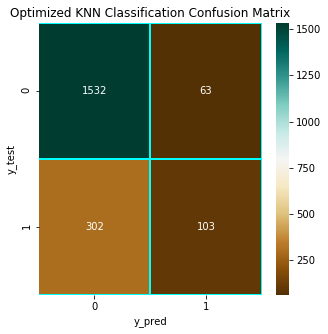

In [37]:
# Creating the confusion matrix:
knn_opt_cm = confusion_matrix(y_test, y_pred2)

# Visualization:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_opt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Optimized KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [38]:
knn_opt_score = knn_opt.score(x_test, y_test)
print(knn_opt_score)

0.8175


Using Grid Search Cross Vavlidation we found our optimized KNN model parameters and an acurrate score of 81.75%.

### Random Decision Forests Model

In [39]:
# Defining the model with an arrbitery k numbers of 10 estimators and as a starting point:
rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Training:
rf.fit(x_train, y_train)

# Predicting:
y_pred3 = rf.predict(x_test)

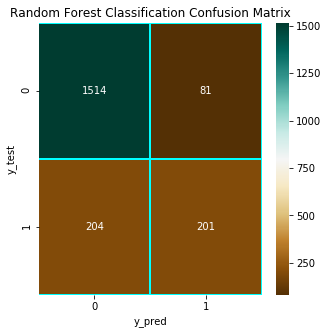

In [40]:
# Creating the confusion matrix:
rf_cm = confusion_matrix(y_test, y_pred3)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [41]:
rf_score = rf.score(x_test, y_test)
print(rf_score)

0.8575


Our score is about 85.75% and that is a much better score but we want to get a more acurate score using different splits of the data.

In [42]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new RF model
rf_cv = RandomForestClassifier(n_estimators=10, random_state=1)
#train model with cv of 5 
rf_cv_scores = cross_val_score(rf_cv, norm_X, y, cv=5)
#print each cv score (accuracy) and average them
print(rf_cv_scores)
print(f'cv_scoremean:{np.mean(rf_cv_scores)}')

[0.849  0.8575 0.852  0.846  0.849 ]
cv_scoremean:0.8507


Using cross-validation, our mean score is about 85.34%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the RF method.

Our initial RF model parameter ‘n_estimators’ was set to 10 just as an arrbitary starting point.
To find the optimal parameters for our model and to improve accuracy, we will use GridSearchCV to find the optimal value for ‘n_estimators’.
For our model, we will specify a range of values for ‘n_estimators’ in order to see which value works best for our model.

In [43]:
from sklearn.model_selection import GridSearchCV

#create new a RF model
rf_grid = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
param_grid = {'n_estimators': np.arange(10, 200)}
#use gridsearch to test all values for n_estimators
rf_gscv = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5)
#fit model to data
rf_gscv.fit(norm_X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 1

In [44]:
#check top performing n_estimators value
rf_gscv.best_params_

{'n_estimators': 111}

In [45]:
# Defining the model with the optimized number of 152 estimators:
rf_opt = RandomForestClassifier(n_estimators=152, random_state=1)

# Training:
rf_opt.fit(x_train, y_train)

# Predicting:
y_pred4 = rf_opt.predict(x_test)

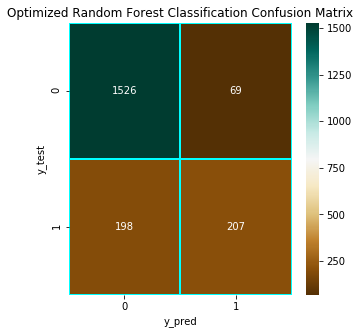

In [46]:
# Creating the confusion matrix:
rf_opt_cm = confusion_matrix(y_test, y_pred4)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_opt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Optimized Random Forest Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [47]:
rf_opt_score = rf_opt.score(x_test, y_test)
print(rf_opt_score)

0.8665


Using Grid Search Cross Vavlidation we found our optimized RF model parameters and an acurrate score of 86.65%.

### Comparing the Classification Algorithms

First, lets compare to a dummy model.

In [48]:
data.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

We can see by the value counts of the whole data set that if we would guess that no customer ever left, the guessing model score would be 0.7963 meaning we would be right 79.63% of the time. Not too bad.

In [49]:
dummy_score = data.Exited.value_counts(normalize=True)[0]

In [50]:
print(f'''
dummy_score: {dummy_score}
knn_opt_score: {knn_opt_score}
rf_opt_score: {rf_opt_score}
''')


dummy_score: 0.7963
knn_opt_score: 0.8175
rf_opt_score: 0.8665



Our best score is from the Optimized Random Forest Classification with 86.65% prediction success rate and cross validation unsuring it's accuracy.

#  Modeling with Dimensionality Reduction

## Dimensionality Reduction

Even tough we got nice result's, we might get same or even better results with with less complexed model, which means a lighter, and more accurate model for us.

So let's look for a combination of features that capture well the variance of the original features. 
To do so, we can first look at the explained variance as a function of the number of dimensions:

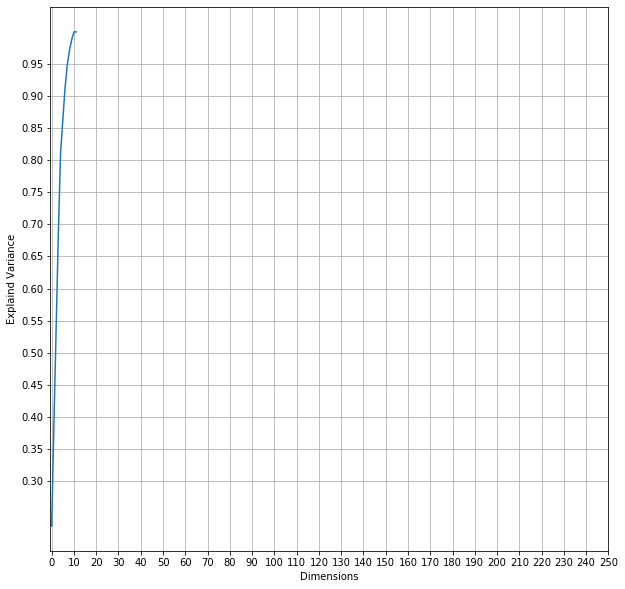

In [53]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_[:250])

plt.figure(figsize=(10,10))
plt.plot(cumsum)
plt.xlabel("Dimensions")
plt.ylabel("Explaind Variance")
plt.grid(True)
plt.xticks(range(0,260,10))
plt.yticks(np.arange(0.3,1.0,0.05))
plt.show()

As we can see in the graph, there is no place for improvment pca wise. 
So lets try more advenced models. 

### AdaBoostClassifier

In [58]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
adbScore = adb.score(x_test, y_test)*100
print("The ADB model score is: {:.2f}%".format(adbScore))

The ADB model score is: 86.35%


### XGBClassifier

In [61]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgbScore = xgb.score(x_test, y_test)*100
print("The XGB model score is: {:.2f}%".format(xgbScore))

C:\Users\elior\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:44:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The XGB model score is: 85.30%


Unfortenatly 'VotingClassifier' and 'StackingClassifier' do not work here.
I conclusion,  we didnt get an improvement in the results, even with the more advenced models.